In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
xyz=pd.read_csv("ML_Assignment.csv",parse_dates=['Date'],index_col=['Date'])

In [ ]:
xyz.tail()

,sales
Date,
2017-05-01,31739
2017-06-01,30315
2017-07-01,25046
2017-08-01,23285
2017-09-01,26721


In [ ]:
totaldata=xyz['sales'].resample('MS').sum()

In [ ]:
totaldata.head()

Date
2005-01-01    10827
2005-02-01    12049
2005-03-01    18298
2005-04-01    17834
2005-05-01    16480
Freq: MS, Name: sales, dtype: int64

In [ ]:
totaldata.tail()

Date
2017-05-01    31739
2017-06-01    30315
2017-07-01    25046
2017-08-01    23285
2017-09-01    26721
Freq: MS, Name: sales, dtype: int64

In [ ]:
len(totaldata)

153

<Axes: xlabel='Date'>

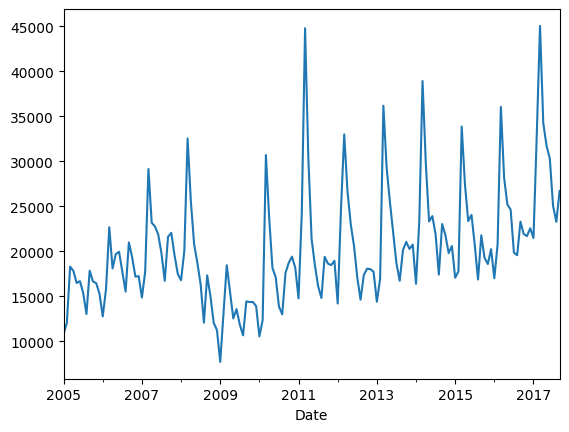

In [ ]:
totaldata.plot()

In [ ]:
import statsmodels.api as sm

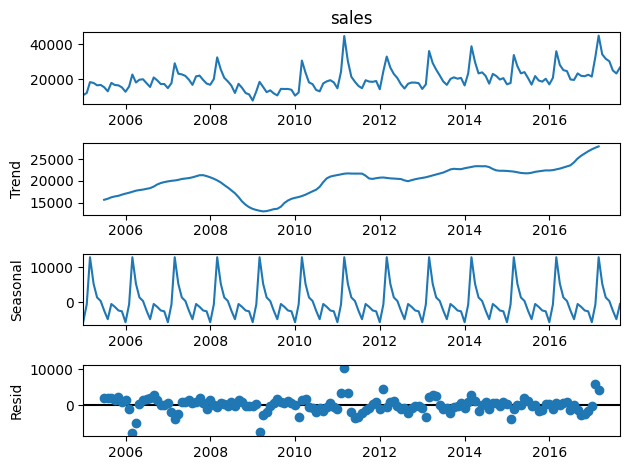

In [ ]:
decomposition=sm.tsa.seasonal_decompose(totaldata,model='additive')
fig= decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
Augmented_Dickey_Fuller=adfuller(totaldata)
print('pvalue of adfuller test is: ',Augmented_Dickey_Fuller[1])

pvalue of adfuller test is:  0.6359081904491788


In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
Kpss_test= kpss(totaldata)
print('pvalue of kpss test is: ',Kpss_test[1])

pvalue of kpss test is:  0.01


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

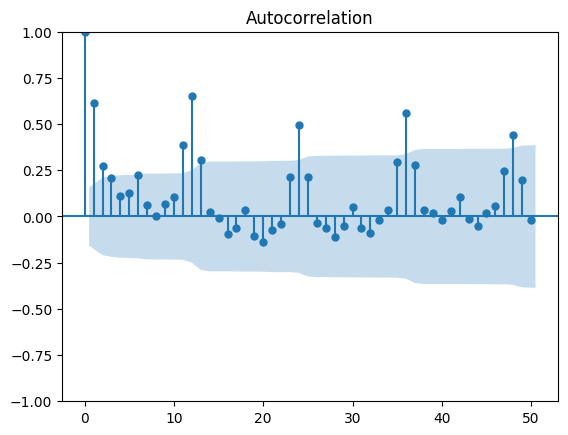

In [ ]:
plot_acf(xyz['sales'],lags=50)
plt.show()

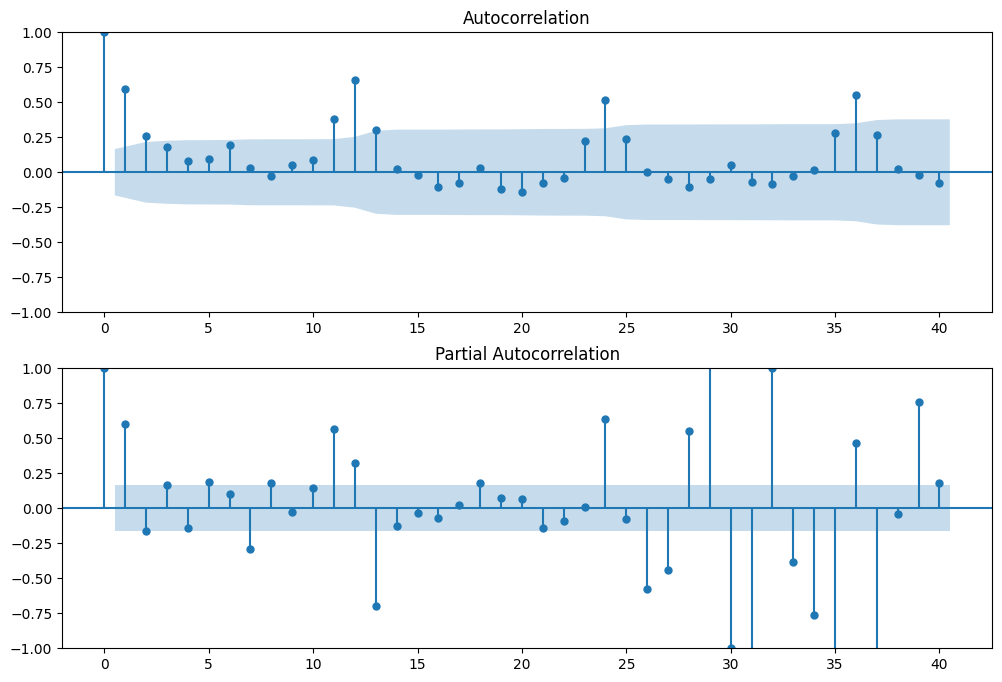

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot (211)
fig = sm.graphics.tsa.plot_acf(xyz['sales'].iloc [13: ], lags=40, ax=ax1)
ax2 = fig.add_subplot (212)
fig = sm.graphics. tsa.plot_pacf(xyz['sales'].iloc[13:], lags=40, ax=ax2)

In [ ]:
xyz['Seasonal First Differnce']=xyz['sales']-xyz['sales'].shift(1)

In [ ]:
xyz.head(5)

,sales
Date,
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480


<Axes: xlabel='Date'>

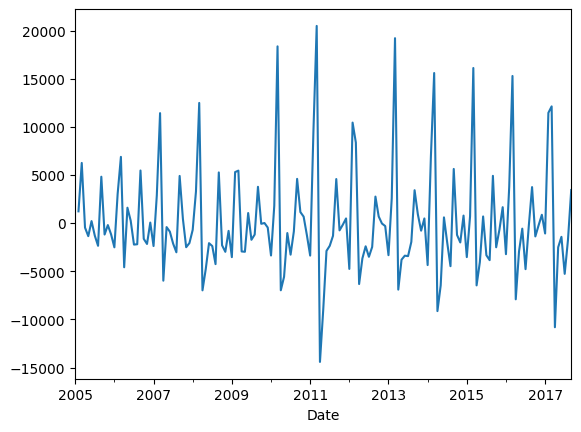

In [ ]:
xyz['Seasonal First Differnce'].plot()

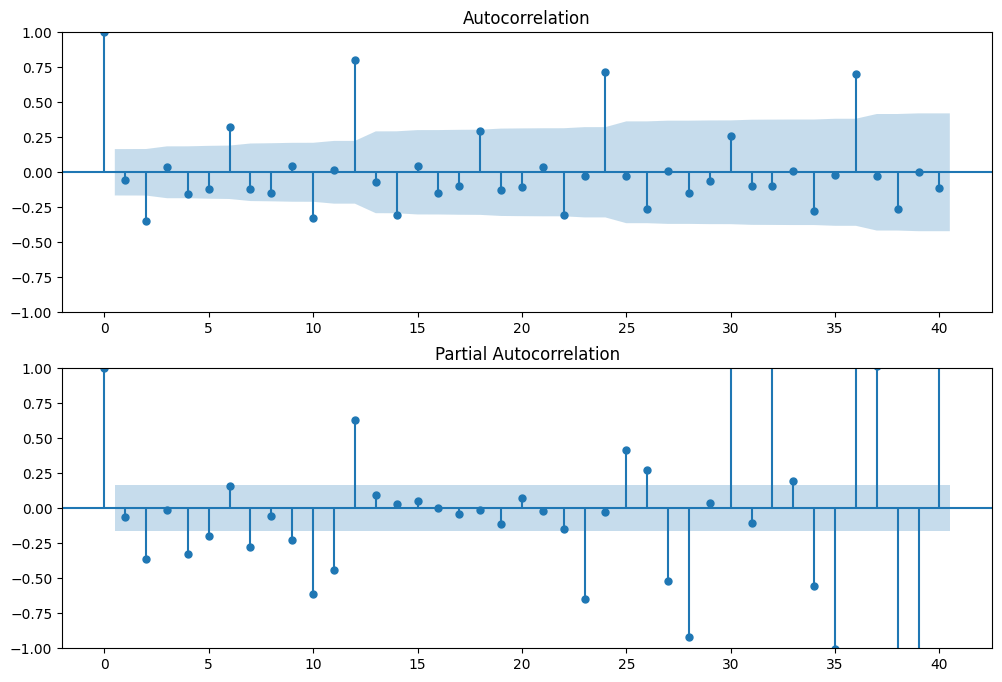

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot (211)
fig = sm.graphics.tsa.plot_acf(xyz['Seasonal First Differnce'].iloc [13: ], lags=40, ax=ax1)
ax2 = fig.add_subplot (212)
fig = sm.graphics. tsa.plot_pacf(xyz['Seasonal First Differnce'].iloc[13:], lags=40, ax=ax2)

In [ ]:
adfuller(xyz['Seasonal First Differnce'].dropna())

(-3.3659868958268646,
 0.012174488835471259,
 12,
 139,
 {'1%': -3.4782936965183815,
  '5%': -2.882567574015525,
  '10%': -2.5779830117488745},
 2579.8293416157467)

In [ ]:
train=totaldata[:101]
test=totaldata[101:]

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_model = auto_arima(train, start_p=0, start_q=0,
                           max_p=4, max_q=4, m=12,
                           start_P=0, start_Q=0, max_P=4, max_Q=4, seasonal=True,
                           start_d=0,max_d=2, start_D=0, max_D=2, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True,
                           random_state=42,
                           n_fits=100)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1763.022, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1693.173, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1724.500, Time=1.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1762.756, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1700.418, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1677.136, Time=4.33 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=1674.514, Time=10.22 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=1675.368, Time=19.14 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=11.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=9.96 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=1764.176, Time=0.71 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=1675.657, Time=3.25 sec
 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=1680.205, Time=1.27 sec
 ARIMA(0,0,1)(3,1,0)[12] interc

In [ ]:
stepwise_model = auto_arima(totaldata, start_p=0, start_q=0,
                           max_p=4, max_q=4, m=12,
                           start_P=0, start_Q=0, max_P=4, max_Q=4, seasonal=True,
                           start_d=0,max_d=2, start_D=0, max_D=2, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True,
                           random_state=42,
                           n_fits=100)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3055.330, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2881.785, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3053.388, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3056.831, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2869.288, Time=1.48 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2877.447, Time=2.99 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2858.637, Time=1.90 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2941.886, Time=1.45 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(1,1,0)(1,0,3)[12] intercept   : AIC=2843.503, Time=6.65 sec
 ARIMA(1,1,0)(0,0,3)[12] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(1,1,0)(2,0,3)[12] intercept   : AIC=i

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.arima.estimators.statespace import SARIMAX
model2=SARIMAX(train,order=(1,0,0),seasonal_order=(4,1,0,12)).fit()
print(model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  101
Model:             SARIMAX(1, 0, 0)x(4, 1, 0, 12)   Log Likelihood                -833.768
Date:                            Tue, 09 May 2023   AIC                           1679.536
Time:                                    04:56:44   BIC                           1694.468
Sample:                                01-01-2005   HQIC                          1685.555
                                     - 05-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8662      0.066     13.163      0.000       0.737       0.995
ar.S.L12      -0.3321      0.130   

In [ ]:
pred2=model2.predict(start=len(train),end=len(totaldata)-1)

<Axes: xlabel='Date'>

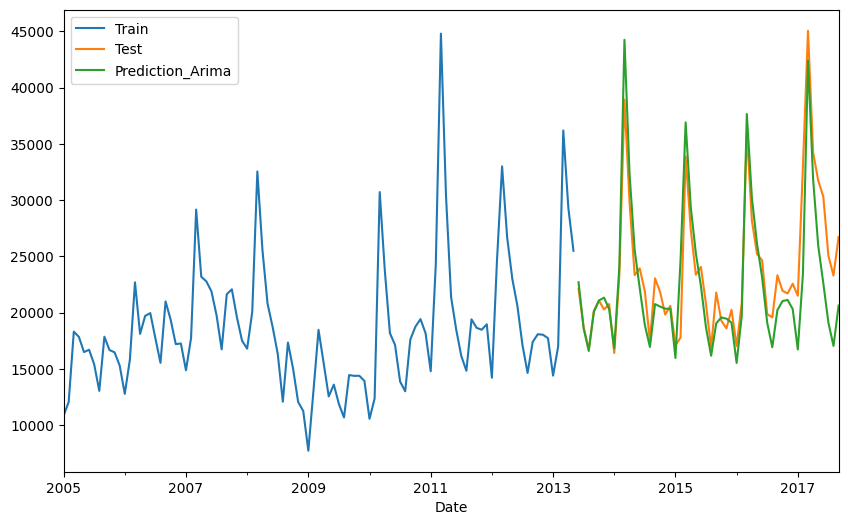

In [ ]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred2.plot(legend=True,label='Prediction_Arima')

In [ ]:
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test,pred2))
error

3137.6793219890956

In [ ]:
model3=SARIMAX(totaldata,order=(1,1,0),seasonal_order=(1,0,3,12)).fit()
print(model3.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                      sales   No. Observations:                  153
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -1412.206
Date:                                    Fri, 14 Apr 2023   AIC                           2836.412
Time:                                            18:43:23   BIC                           2854.555
Sample:                                        01-01-2005   HQIC                          2843.782
                                             - 09-01-2017                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1601      0.085     -1.884      0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model=SARIMAX(totaldata,order=(1,1,4),seasonal_order=(0,1,1,12)).fit()

In [ ]:
Final_model2=SARIMAX(totaldata,order=(1,1,0),seasonal_order=(1,0,3,12)).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
prediction2=Final_model2.predict(len(totaldata),len(totaldata)+8)
prediction2.head(8)

2017-10-01    25750.289343
2017-11-01    24236.345955
2017-12-01    24727.701098
2018-01-01    23635.472412
2018-02-01    27326.708779
2018-03-01    41736.620077
2018-04-01    34048.780700
2018-05-01    31806.387088
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

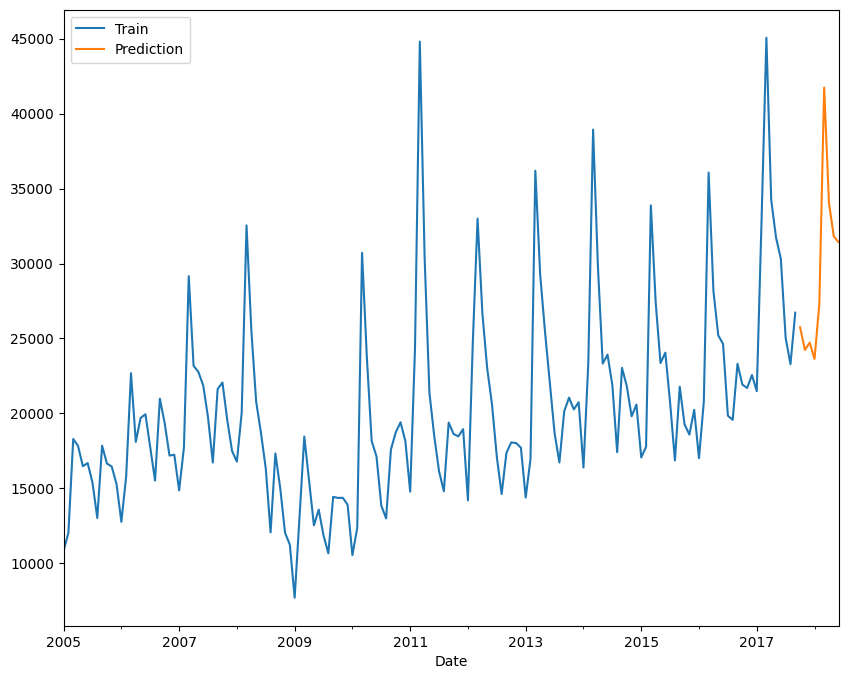

In [ ]:
totaldata.plot(legend=True,label='Train',figsize=(10,8))
prediction2.plot(legend=True,label='Prediction')